In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('corona_tested_individuals_ver_0083.english.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

test_date  cough  fever  sore_throat  shortness_of_breath  head_ache  \
0  2020-11-12      0      0            0                    0          0   
1  2020-11-12      0      1            0                    0          0   
2  2020-11-12      0      0            0                    0          0   
3  2020-11-12      0      0            0                    0          0   
4  2020-11-12      0      1            0                    0          0   

  corona_result age_60_and_above  gender         test_indication  
0      negative               No    male                   Other  
1      negative               No    male                   Other  
2      negative              Yes  female                   Other  
3      negative               No    male                   Other  
4      negative               No    male  Contact with confirmed

In [3]:
# Data Cleaning: Checking for missing values and data types

# Checking for missing values
missing_values = data.isnull().sum()

# Checking data types
data_types = data.dtypes

missing_values, data_types

(test_date                   0
 cough                       0
 fever                       0
 sore_throat                 0
 shortness_of_breath         0
 head_ache                   0
 corona_result               0
 age_60_and_above       547644
 gender                  92886
 test_indication             0
 dtype: int64,
 test_date              object
 cough                   int64
 fever                   int64
 sore_throat             int64
 shortness_of_breath     int64
 head_ache               int64
 corona_result          object
 age_60_and_above       object
 gender                 object
 test_indication        object
 dtype: object)

In [4]:
# Data type conversion and verification of unique values in categorical columns

# Convert 'test_date' to datetime
data['test_date'] = pd.to_datetime(data['test_date'])

# Convert symptoms and age_60_and_above to integers where possible
# We will first check the unique values before conversion
symptom_cols = ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache']
unique_values_symptoms = {col: data[col].unique() for col in symptom_cols}
unique_values_age = data['age_60_and_above'].unique()
unique_values_gender = data['gender'].unique()
unique_values_result = data['corona_result'].unique()
unique_values_test_indication = data['test_indication'].unique()

unique_values_symptoms, unique_values_age, unique_values_gender, unique_values_result, unique_values_test_indication

({'cough': array([0, 1], dtype=int64),
  'fever': array([0, 1], dtype=int64),
  'sore_throat': array([0, 1], dtype=int64),
  'shortness_of_breath': array([0, 1], dtype=int64),
  'head_ache': array([0, 1], dtype=int64)},
 array(['No', 'Yes', nan], dtype=object),
 array(['male', 'female', nan], dtype=object),
 array(['negative', 'positive', 'other'], dtype=object),
 array(['Other', 'Contact with confirmed', 'Abroad'], dtype=object))

In [5]:
# Converting and cleaning the data as per the observations

# Function to convert symptoms to numeric, treating 'None' as NaN
def convert_symptoms(col):
    return pd.to_numeric(data[col], errors='coerce')

# Converting symptom columns
for col in symptom_cols:
    data[col] = convert_symptoms(col)

# Converting 'age_60_and_above' to a binary format (1 for 'Yes', 0 for 'No', NaN for 'None')
data['age_60_and_above'] = data['age_60_and_above'].map({'Yes': 1, 'No': 0, 'None': None})

# Checking the conversions
data.head(), data.dtypes


(   test_date  cough  fever  sore_throat  shortness_of_breath  head_ache  \
 0 2020-11-12      0      0            0                    0          0   
 1 2020-11-12      0      1            0                    0          0   
 2 2020-11-12      0      0            0                    0          0   
 3 2020-11-12      0      0            0                    0          0   
 4 2020-11-12      0      1            0                    0          0   
 
   corona_result  age_60_and_above  gender         test_indication  
 0      negative               0.0    male                   Other  
 1      negative               0.0    male                   Other  
 2      negative               1.0  female                   Other  
 3      negative               0.0    male                   Other  
 4      negative               0.0    male  Contact with confirmed  ,
 test_date              datetime64[ns]
 cough                           int64
 fever                           int64
 sore_thro

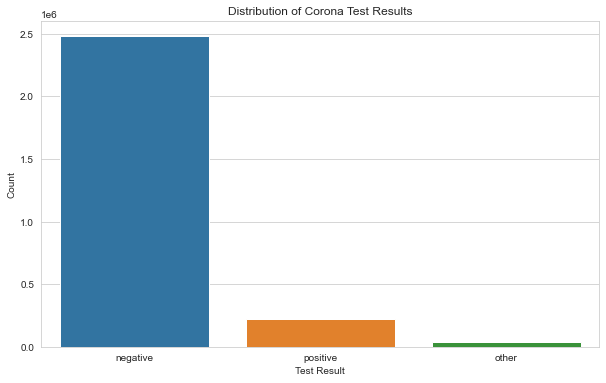

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of Test Results
plt.figure(figsize=(10, 6))
sns.countplot(x='corona_result', data=data)
plt.title('Distribution of Corona Test Results')
plt.xlabel('Test Result')
plt.ylabel('Count')
plt.show()

# Distribution of Symptoms in the Dataset
plt.figure(figsize=(10, 6))
symptom_counts = data[symptom_cols].sum().sort_values(ascending=False)
sns.barplot(x=symptom_counts.index, y=symptom_counts.values)
plt.title('Distribution of Symptoms Reported')
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.show()


In [7]:
# Analyzing symptom prevalence in positive cases

# Filtering data for positive test results
positive_cases = data[data['corona_result'] == 'positive']

# Calculating symptom prevalence in positive cases
symptom_prevalence_positive = positive_cases[symptom_cols].mean().sort_values(ascending=False)

# Plotting the symptom prevalence in positive cases
plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_prevalence_positive.index, y=symptom_prevalence_positive.values)
plt.title('Prevalence of Symptoms in Positive COVID-19 Cases')
plt.xlabel('Symptoms')
plt.ylabel('Prevalence')
plt.show()

In [8]:
# Encoding the test results as numeric for correlation analysis
# 1 for positive, 0 for negative and other
data['corona_result_numeric'] = data['corona_result'].map({'positive': 1, 'negative': 0, 'other': 0})

# Calculating the correlation between symptoms and test results
correlation_with_result = data[symptom_cols + ['corona_result_numeric']].corr()['corona_result_numeric'][:-1]

# Plotting the correlation
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_result.index, y=correlation_with_result.values)
plt.title('Correlation of Symptoms with COVID-19 Test Results')
plt.xlabel('Symptoms')
plt.ylabel('Correlation Coefficient')
plt.show()


In [9]:
# Calculating count and percentage for each symptom in the entire dataset

# Count of each symptom
symptom_counts_total = data[symptom_cols].sum()

# Percentage of each symptom
symptom_percentages_total = (data[symptom_cols].mean() * 100).round(2)

# Creating a DataFrame for better presentation
symptom_summary = pd.DataFrame({
    'Symptom Count': symptom_counts_total,
    'Symptom Percentage (%)': symptom_percentages_total
})

symptom_summary


Symptom Count  Symptom Percentage (%)
cough                       111338                    4.06
fever                        96996                    3.54
sore_throat                  30084                    1.10
shortness_of_breath          11017                    0.40
head_ache                    59941                    2.19

<Figure size 864x432 with 0 Axes>

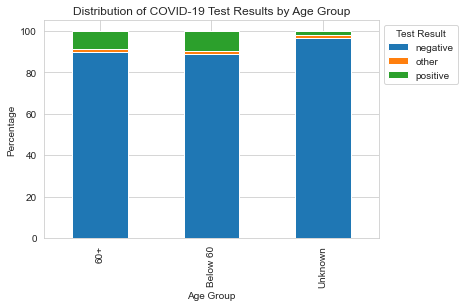

<Figure size 864x432 with 0 Axes>

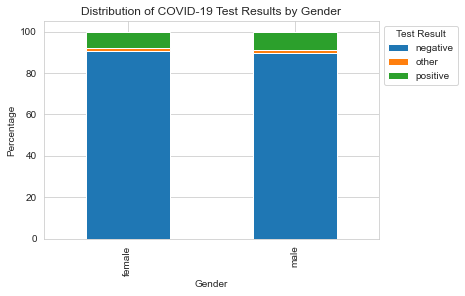

In [10]:
# Analyzing the distribution of COVID-19 test results by age and gender

# Preparing data for analysis
# For age, we'll use the 'age_60_and_above' column
data['age_group'] = data['age_60_and_above'].map({1.0: '60+', 0.0: 'Below 60', None: 'Unknown'})

# Distribution of test results by age group
age_group_results = pd.crosstab(data['age_group'], data['corona_result'], normalize='index') * 100

# Distribution of test results by gender
gender_results = pd.crosstab(data['gender'], data['corona_result'], normalize='index') * 100

# Plotting the distribution by age group
plt.figure(figsize=(12, 6))
age_group_results.plot(kind='bar', stacked=True)
plt.title('Distribution of COVID-19 Test Results by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Test Result',loc='upper left',bbox_to_anchor=(1,1))
plt.show()

# Plotting the distribution by gender
plt.figure(figsize=(12, 6))
gender_results.plot(kind='bar', stacked=True)
plt.title('Distribution of COVID-19 Test Results by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Test Result',loc='upper left',bbox_to_anchor=(1,1))
plt.show()


In [11]:
# Calculating the prevalence of cough and fever in different age groups
age_group_symptoms = data.groupby('age_group')[symptom_cols].mean() * 100

# Calculating the prevalence of cough and fever between genders
gender_symptoms = data.groupby('gender')[symptom_cols].mean() * 100

# Function to add values to the bars in the plot
def add_values_to_bars(ax):
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height), ha='center')

# Plotting the prevalence of symptoms by age group with values
plt.figure(figsize=(12, 6))
ax1 = age_group_symptoms.plot(kind='bar')
plt.title('Prevalence of Symptoms by Age Group with Values')
plt.xlabel('Age Group')
plt.ylabel('Prevalence (%)')
plt.legend(title='Symptom',loc='upper left',bbox_to_anchor=(1,1))
add_values_to_bars(ax1)
plt.show()

# Plotting the prevalence of symptoms by gender with values
plt.figure(figsize=(12, 6))
ax2 = gender_symptoms.plot(kind='bar')
plt.title('Prevalence of Symptoms by Gender with Values')
plt.xlabel('Gender')
plt.ylabel('Prevalence (%)')
plt.legend(title='Symptom',loc='upper left',bbox_to_anchor=(1,1))
add_values_to_bars(ax2)
plt.show()


<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [12]:
# Function to add values to the bars in the plot
def add_values_to_bars(ax):
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height), ha='center')

# Plotting the prevalence of symptoms by age group with values
plt.figure(figsize=(12, 6))
ax1 = age_group_symptoms.plot(kind='bar')
plt.title('Prevalence of Symptoms by Age Group with Values')
plt.xlabel('Age Group')
plt.ylabel('Prevalence (%)')
plt.legend(title='Symptom',loc='upper left',bbox_to_anchor=(1,1))
add_values_to_bars(ax1)
plt.show()

# Plotting the prevalence of symptoms by gender with values
plt.figure(figsize=(12, 6))
ax2 = gender_symptoms.plot(kind='bar')
plt.title('Prevalence of Symptoms by Gender with Values')
plt.xlabel('Gender')
plt.ylabel('Prevalence (%)')
plt.legend(title='Symptom',loc='upper left',bbox_to_anchor=(1,1))
add_values_to_bars(ax2)
plt.show()

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>